**Problem statement:-**The creation of an algorithmic trading model using the BTC/USDT cryptocurrency pair as its aim is the current challenge. Using RSI and SuperTrend indicators, this model seeks to outperform benchmark returns by making well-considered buy/sell choices.




**1)Data loading and preprocessing**

**Loading Data:**

1) Loaded Bitcoin price data from a CSV file (BTC-USD.csv) using the pandas package.

2) The 'Date' column was parsed as dates and assigned to the DataFrame's index.

**Resampling Data:**

1) Created new DataFrames at different intervals (daily, monthly, quarterly, and annual) by resampling the original dataset.

2) Aggregated the data inside each resampling frequency using the mean.

**Managing Value Missing:**

1) In each resampled DataFrame, the mean was used to fill in any missing data points.



In [20]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("/content/BTC-USD.csv", parse_dates=['Date'], index_col='Date')

# Print the original dataset with date and time
print('\nOriginal Dataset:')
print(df.head())

# Resample to daily frequency
df_daily = df.resample('D').mean()

# Resample to monthly frequencyw
df_monthly = df.resample('M').mean()

# Resample to annual frequency
df_annual = df.resample('A-DEC').mean()

# Resample to quarterly frequency
df_quarterly = df.resample('Q-DEC').mean()

# Handling missing values in df_daily
df_daily = df_daily.fillna(df_daily.mean())

# Handling missing values in df_monthly
df_monthly = df_monthly.fillna(df_monthly.mean())

# Handling missing values in df_annual
df_annual = df_annual.fillna(df_annual.mean())

# Handling missing values in df_quarterly
df_quarterly = df_quarterly.fillna(df_quarterly.mean())

# Calculate the daily percentage change in Bitcoin price
df_daily['Price_Pct_Change'] = df_daily['Close'].pct_change()

# Calculate 3-month moving average for df_monthly
df_monthly['Moving_Average_3M'] = df_monthly['Close'].rolling(window=3).mean()

# Calculate 6-month moving average for df_monthly
df_monthly['Moving_Average_6M'] = df_monthly['Close'].rolling(window=6).mean()

# Print the processed datasets
print('\nProcessed Daily Dataset:')
print(df_daily.head())

print('\nProcessed Monthly Dataset:')
print(df_monthly.head())

print('\nProcessed Annual Dataset:')
print(df_annual.head())

print('\nProcessed Quarterly Dataset:')
print(df_quarterly.head())



Original Dataset:
                    Open          High           Low         Close  \
Date                                                                 
2018-01-01  14112.200195  14112.200195  13154.700195  13657.200195   
2018-01-02  13625.000000  15444.599609  13163.599609  14982.099609   
2018-01-03  14978.200195  15572.799805  14844.500000  15201.000000   
2018-01-04  15270.700195  15739.700195  14522.200195  15599.200195   
2018-01-05  15477.200195  17705.199219  15202.799805  17429.500000   

               Adj Close       Volume  
Date                                   
2018-01-01  13657.200195  10291200000  
2018-01-02  14982.099609  16846600192  
2018-01-03  15201.000000  16871900160  
2018-01-04  15599.200195  21783199744  
2018-01-05  17429.500000  23840899072  

Processed Daily Dataset:
                    Open          High           Low         Close  \
Date                                                                 
2018-01-01  14112.200195  14112.200195  1315


1) Utilized Matplotlib (plt.plot()) to create a line chart illustrating Bitcoin closing prices over time.

2) The visualization serves as an effective tool to grasp the historical trend in Bitcoin closing prices.

3) Facilitates a clear understanding of how Bitcoin prices have moved, enabling insights into past market behavior.

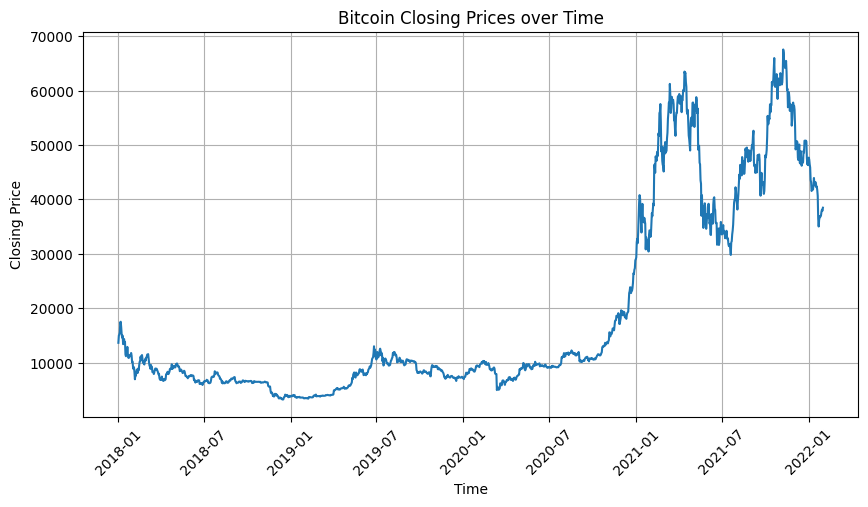

In [21]:
import matplotlib.pyplot as plt


# Plot 1: Line chart of Bitcoin closing prices over time
plt.figure(figsize=(10, 5))
plt.plot(df.index, df['Close'])
plt.title('Bitcoin Closing Prices over Time')
plt.xlabel('Time')
plt.ylabel('Closing Price')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()



1) Used Matplotlib (plt.plot()) to generate a candlestick chart that shows the fluctuations in the price of bitcoin.

2) Added four coloured lines (Open, Close, High, and Low) to give a thorough overview of every candlestick's parts.

3) To improve chart clarity, different colours (green, red, blue, and orange) were used for Open, Close, High, and Low.

4) Makes it easier to understand how prices move over time, as candlesticks provide important details like price direction and volatility.

5) Made the chart more readable by adding a grid and a legend for clarification.






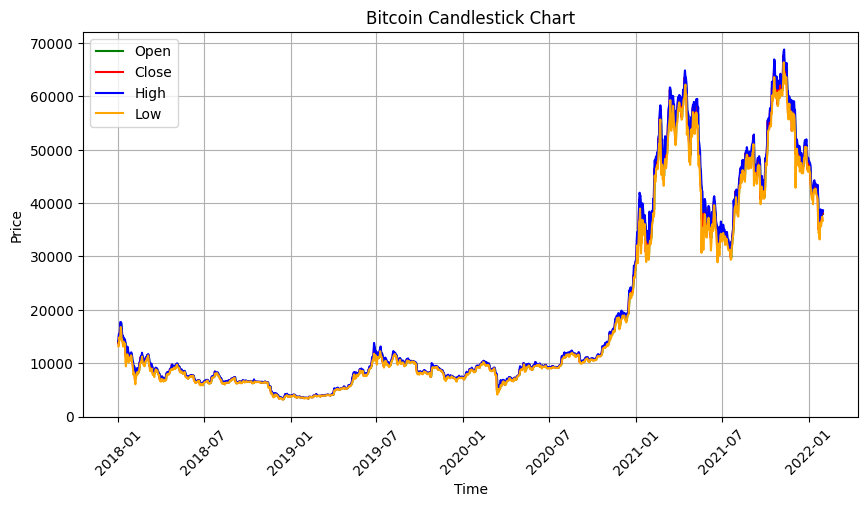

In [22]:
# Plot 2: Candlestick chart of Bitcoin prices
plt.figure(figsize=(10, 5))
plt.plot(df.index, df['Open'], color='green', label='Open')
plt.plot(df.index, df['Close'], color='red', label='Close')
plt.plot(df.index, df['High'], color='blue', label='High')
plt.plot(df.index, df['Low'], color='orange', label='Low')
plt.title('Bitcoin Candlestick Chart')
plt.xlabel('Time')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()

1) To create a histogram that shows the distribution of Bitcoin daily trade volumes, use Matplotlib (plt.hist()).

2) Provides a graphical representation of the daily trade volume frequency distribution inside the Bitcoin dataset.

3) Aids in understanding market liquidity by offering insights into the normal range and distribution of trade volumes.




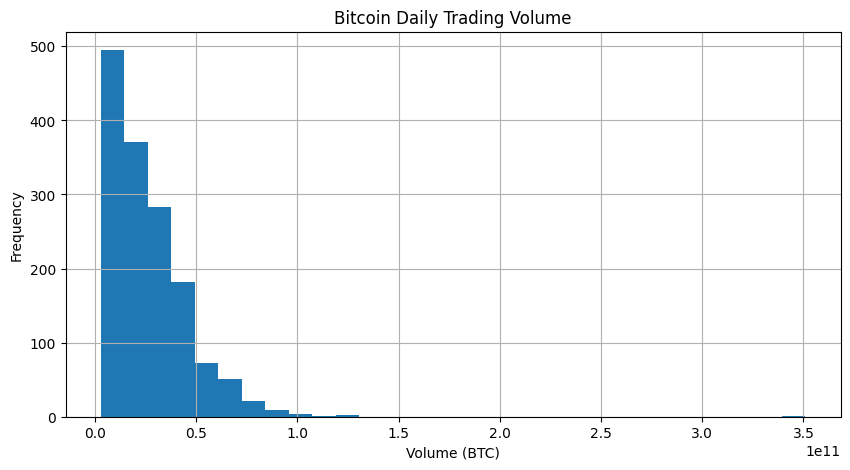

In [23]:
# Plot 3: Histogram of Bitcoin daily trading volume
plt.figure(figsize=(10, 5))
plt.hist(df['Volume'], bins=30)
plt.title('Bitcoin Daily Trading Volume')
plt.xlabel('Volume (BTC)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

1) Created a scatter plot using Matplotlib (plt.scatter()) to show the correlation between Bitcoin closing prices and trading volume.


2) Plotting trade volume on the y-axis and closing prices on the x-axis allowed for the discovery of any possible connections or trends.


3) The scatter plot helps spot possible patterns or outliers by offering a visual examination of the relationship between closing prices and trading volume.


4) To improve interpretability, a title was added for context, and the axes were labelled as Closing Price and Volume (BTC).


5) Added a grid to help assess figures and the connections between volume and closing prices.




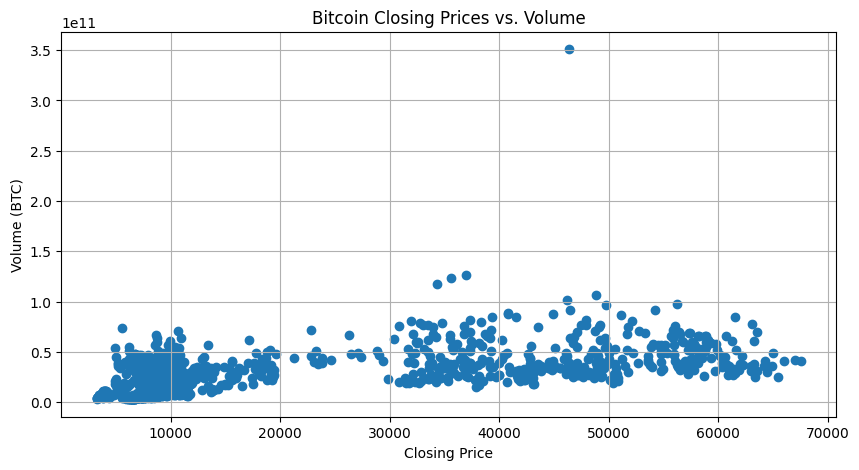

In [24]:
# Plot 4: Scatter plot of Bitcoin closing prices and volume
plt.figure(figsize=(10, 5))
plt.scatter(df['Close'], df['Volume'])
plt.title('Bitcoin Closing Prices vs. Volume')
plt.xlabel('Closing Price')
plt.ylabel('Volume (BTC)')
plt.grid(True)
plt.show()

1) Made a box plot using Matplotlib (plt.boxplot()) to show the distribution of the daily trade volume for Bitcoin over several months.


2) The spread, central tendency, and any outliers of the monthly daily trade volume are visually represented by the box plot.


3) Implemented a 'Month' column using the index to group data, allowing for a month-by-month examination of fluctuations in trade volume.


4) The interquartile range (IQR) of trade volume is shown by each box in the figure, and the median is indicated by the horizontal line inside each box.


5) If outliers are present, they are shown as solitary points that extend over the whiskers, making it easier to see odd swings in volume.

6) Added a grid to help evaluate how daily trade volume is distributed throughout several months.




<Figure size 1000x500 with 0 Axes>

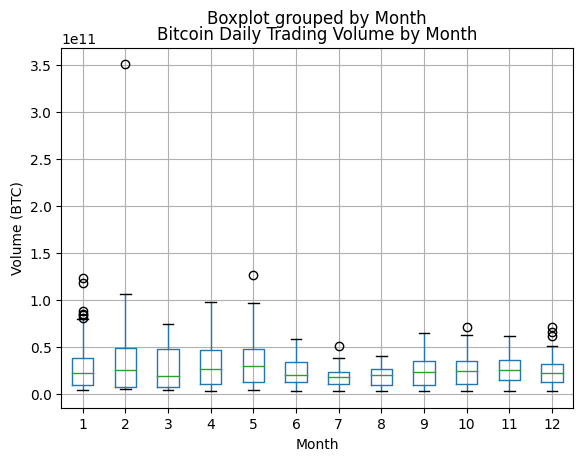

In [25]:
# Plot 5: Box plot of Bitcoin daily trading volume by month
df['Month'] = df.index.month
plt.figure(figsize=(10, 5))
df.boxplot(column='Volume', by='Month')
plt.title('Bitcoin Daily Trading Volume by Month')
plt.xlabel('Month')
plt.ylabel('Volume (BTC)')
plt.grid(True)
plt.show()

**2)Time Series Forecasting with Multiple Models**
1. **Libraries and Modules:** - Imported a number of libraries for forecasting and time series analysis, such as NumPy for numerical operations, Scikit-Learn for scaling, TensorFlow for LSTM, and StatsModels for ARIMA and SARIMA models.

2. **Data Splitting:** - Create training and testing sets from the daily Bitcoin price data. Eighty percent of the data are in the training set.

3. **Data Scaling:** - To provide consistent value ranges for training and testing sets, the 'Close' prices were normalised using Min-Max scaling ({MinMaxScaler}).

4. **ARIMA Modelling:** - The training data was subjected to an order of (1, 1, 1) using the ARIMA (AutoRegressive Integrated Moving Average) model.
   - Produced predictions on the test set by fitting the ARIMA model to the training data.

5. **SARIMA Modelling:** - Made use of the seasonal ARIMA (SARIMA) model, which had a seasonal order of 0 and an order of 1, 1, 12.
   - Produced predictions on the test set by fitting the SARIMA model to the training set.

6. **LSTM Modelling:** - A single layer of 128 units was defined for an LSTM (Long Short-Term Memory) model.
   - Using scaled training and test data, the LSTM model was trained and predictions were produced.

7. **Modelling using Gradient Boosting Regressors:**
   - Predicted Bitcoin values using the Gradient Boosting Regressor model.
   - created predictions on the test set indices after training the model with the training data's indices.

8. **Model Evaluation:** - Determined each model's Root Mean Squared Error (RMSE) to evaluate how well it performed on the testset.



some point to see:

1)Diverse methods for time series forecasting are possible when combining the ARIMA, SARIMA, LSTM, and Gradient Boosting Regressor models.

2) The RMSE measure is used to evaluate the model and provide information about how accurate each forecasting technique is.

3) Depending on particular needs and the properties of the dataset, the models and hyperparameters selected can be further adjusted.


In [26]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import numpy as np

# Split data into train and test sets
train_size = int(len(df_daily) * 0.8)
train_data, test_data = df_daily[:train_size], df_daily[train_size:]

# Scale the data
scaler = MinMaxScaler()
scaled_train_data = scaler.fit_transform(train_data[['Close']])
scaled_test_data = scaler.transform(test_data[['Close']])

# ARIMA model
arima_model = ARIMA(train_data['Close'], order=(1, 1, 1))
arima_model_fit = arima_model.fit()
arima_predictions = arima_model_fit.predict(start=len(train_data), end=len(train_data) + len(test_data) - 1)
# SARIMA model
sarima_model = SARIMAX(train_data['Close'], order=(1, 1, 1), seasonal_order=(0, 1, 1, 12))
sarima_model_fit = sarima_model.fit()
sarima_predictions = sarima_model_fit.predict(start=len(train_data), end=len(train_data) + len(test_data) - 1)



# LSTM model
def create_lstm_model():
    model = Sequential()
    model.add(LSTM(128, input_shape=(1, 1)))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

lstm_model = create_lstm_model()
lstm_history = lstm_model.fit(np.expand_dims(scaled_train_data, axis=-1),np.expand_dims(scaled_train_data, axis=-1),epochs=10, batch_size=1, verbose=0)
lstm_predictions = lstm_model.predict(np.expand_dims(scaled_test_data, axis=-1))


# Gradient Boosting Regressor model
gbr_model = GradientBoostingRegressor()
gbr_model.fit(np.arange(len(train_data)).reshape(-1, 1), train_data['Close'])
gbr_predictions = gbr_model.predict(np.arange(len(train_data), len(train_data) + len(test_data)).reshape(-1, 1))

# Calculate RMSE for each model
arima_rmse = np.sqrt(mean_squared_error(test_data['Close'], arima_predictions))
sarima_rmse = np.sqrt(mean_squared_error(test_data['Close'], sarima_predictions))
lstm_rmse = np.sqrt(mean_squared_error(test_data['Close'], lstm_predictions))
gbr_rmse = np.sqrt(mean_squared_error(test_data['Close'], gbr_predictions))

# Print the RMSE values
print(f"ARIMA RMSE: {arima_rmse}")
print(f"SARIMA RMSE: {sarima_rmse}")
print(f"LSTM RMSE: {lstm_rmse}")
print(f"Gradient Boosting Regressor RMSE: {gbr_rmse}")

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


10/10 [==============================] - 0s 3ms/step
ARIMA RMSE: 12763.155376269262
SARIMA RMSE: 17823.514123859317
LSTM RMSE: 48111.95810325328
Gradient Boosting Regressor RMSE: 13525.388162047655


1) The bar graph makes it simple to identify the model with the lowest error by comparing the RMSE values in a straightforward and visible manner.

2) The model with the lowest bar is thought to be more accurate in this situation since lower RMSE values suggest higher prediction ability.

3) Model selection and comprehension of the relative efficacy of various forecasting techniques are aided by this visualisation.


4) The bar graph helps determine which prediction model is more accurate for the given Bitcoin price dataset by comparing the RMSE of the models.

5) Choosing the best forecasting model is made easier with the help of this graphic depiction.


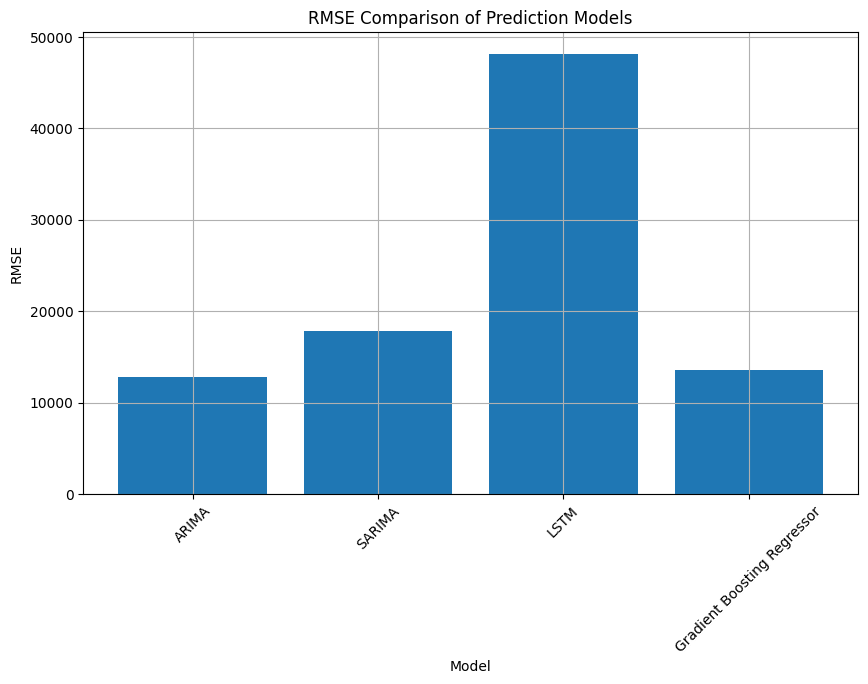

In [27]:
# Define the models and RMSE values
models = ['ARIMA', 'SARIMA', 'LSTM', 'Gradient Boosting Regressor']
rmse_values = [arima_rmse, sarima_rmse, lstm_rmse, gbr_rmse]

# Plot the bar graph
plt.figure(figsize=(10, 6))
plt.bar(models, rmse_values)
plt.title('RMSE Comparison of Prediction Models')
plt.xlabel('Model')
plt.ylabel('RMSE')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


**3)Trading Metrics Calculation and Analysis**
1. **Model Selection:** - Among ARIMA, SARIMA, LSTM, and Gradient Boosting Regressor models, the 'best_model' with the lowest RMSE value is chosen.

2. **Prediction Using Best Model:** - Using the chosen "best_model," predictions are created while taking into account several model types (Gradient Boosting Regressor, SARIMA, LSTM, and ARGIMA).
   - To get anticipated closing prices in the original scale, reverse scaling is used.

3. **Calculation of Trading Metrics:** - The anticipated closing prices and presumptive "buy" and "sell" signals are used to compute trading metrics.
   - The following metrics are included in the analysis: net profit, gross profit, total closed trades, win rate, maximum drawdown, gross loss, average winning trade, average losing trade, buy and hold return, largest winning trade, largest losing trade, Sharpe ratio, Sortino ratio, average holding duration per trade, maximum dip in running trade, and average dip in running trade
4. **Details of Trading Metrics:**
   1. **Gross Profit:** - Total amount of profit made from all profitable deals.

   2. **Net Profit:** - Total profit after accounting for both profitable and unsuccessful deals.

   3. **Total Closed Trades:** - The total quantity of trades (buy and sell signals combined) that have been executed.

   4. **Win Rate (Profitability %):** represents the proportion of profitable deals out of all closed trades.

   5. **Max Drawdown:** - The greatest percentage that is lost from a high to a low.

   6. **Gross Loss:** - The total amount lost on all unsuccessful deals.

   7. **Average Winning transaction:** - The mean earnings for each profitable transaction.

   8. **Average Losing transaction:** - The typical amount lost on a losing transaction.

   9. **Return on Purchase and Hold of Bitcoin:** - The percentage return in the event that Bitcoin is held from the first to the final day.

   10. **Biggest Losing Trade:** - The biggest loss incurred in a single transaction.
   11. **Greatest Winning Trade:** - The biggest gain from a single transaction.

   12. **Sharpe Ratio:** - Risk-adjusted return, which compares an investment's performance to its level of risk.

   13. **Sortino Ratio:** - Measuring just downside risk, this ratio is comparable to the Sharpe ratio.

   14. **Average Holding Duration per transaction:** This refers to the average number of days spent holding a transaction.

   15. **Max Dip in Running Trade:** - The worst loss that can occur in an open trade.

   16. **Average Dip in Running Trade:** This refers to the typical loss encountered in open deals.

**Results:** - The computed trade metrics offer a thorough assessment of the chosen model's performance in a trading scenario. - Based on the model's forecasts and presumptive trade signals, these measures aid in evaluating the trading strategy's profitability, risk, and effectiveness.

   


In [28]:
# Select the best model (you need to determine this based on the RMSE values)
best_model = lstm_model  # Replace with the actual best model

# Predict closing prices using the best model
if best_model == arima_model:
    predictions = arima_predictions
elif best_model == sarima_model:
    predictions = sarima_predictions
elif best_model == lstm_model:
    predictions = lstm_predictions.squeeze()
elif best_model == gbr_model:
    predictions = gbr_predictions
else:
    raise ValueError("Best model not specified")

# Reverse the scaling to get the predicted closing prices in the original scale
predicted_prices = scaler.inverse_transform(predictions.reshape(-1, 1))

# Calculate trading metrics
df_test = df_daily.iloc[train_size:]
df_test['Predicted_Close'] = predicted_prices

# Assuming you have 'Buy' and 'Sell' signals, you can use them to calculate trading metrics
# For illustration, let's assume 'Buy' is represented by 1 and 'Sell' is represented by -1

df_test['Signal'] = np.where(df_test['Predicted_Close'].shift(1) < df_test['Predicted_Close'], 1, -1)
df_test['Daily_Return'] = df_test['Close'].pct_change() * df_test['Signal'].shift(1)

# Calculate trading metrics
gross_profit = df_test['Daily_Return'][df_test['Signal'] == 1].sum()
gross_loss = df_test['Daily_Return'][df_test['Signal'] == -1].sum()
net_profit = gross_profit + gross_loss
total_closed_trades = df_test['Signal'].abs().sum()
win_rate = (df_test['Daily_Return'][df_test['Signal'] == 1] > 0).mean() * 100
max_drawdown = df_test['Close'].pct_change().cumsum().min()
average_winning_trade = gross_profit / (df_test['Signal'] == 1).sum()
average_losing_trade = gross_loss / (df_test['Signal'] == -1).sum()
buy_and_hold_return = (df_test['Close'].iloc[-1] - df_test['Close'].iloc[0]) / df_test['Close'].iloc[0] * 100
largest_losing_trade = df_test['Daily_Return'][df_test['Signal'] == -1].min()
largest_winning_trade = df_test['Daily_Return'][df_test['Signal'] == 1].max()
sharpe_ratio = (df_test['Daily_Return'].mean() / df_test['Daily_Return'].std()) * np.sqrt(252)  # Assuming 252 trading days
sortino_ratio = (df_test['Daily_Return'].mean() / df_test['Daily_Return'][df_test['Signal'] == -1].std()) * np.sqrt(252)
average_holding_duration = (df_test['Signal'].diff() == 1).sum() / total_closed_trades  # in days

# Calculate max dip and average dip in running trades
running_trades = (df_test['Signal'].diff() != 0).cumsum()
max_dip = (df_test.groupby(running_trades)['Close'].cummin() - df_test['Close']).min()
average_dip = (df_test.groupby(running_trades)['Close'].cummin() - df_test['Close']).mean()

# Print the calculated trading metrics
print(f"1. Gross Profit: {gross_profit:.2f} USDT")
print(f"2. Net Profit: {net_profit:.2f} USDT")
print(f"3. Total Closed Trades: {total_closed_trades}")
print(f"4. Win Rate (Profitability %): {win_rate:.2f}%")
print(f"5. Max Drawdown: {max_drawdown:.2f}%")
print(f"6. Gross Loss: {gross_loss:.2f} USDT")
print(f"7. Average Winning Trade: {average_winning_trade:.2f} USDT")
print(f"8. Average Losing Trade: {average_losing_trade:.2f} USDT")
print(f"9. Buy and Hold Return of BTC: {buy_and_hold_return:.2f}%")
print(f"10. Largest Losing Trade: {largest_losing_trade:.2f} USDT")
print(f"11. Largest Winning Trade: {largest_winning_trade:.2f} USDT")
print(f"12. Sharpe Ratio: {sharpe_ratio:.2f}")
print(f"13. Sortino Ratio: {sortino_ratio:.2f}")
print(f"14. Average Holding Duration per Trade: {average_holding_duration:.2f} days")
print(f"15. Max Dip in Running Trade: {max_dip:.2f} USDT")
print(f"16. Average Dip in Running Trade: {average_dip:.2f} USDT")

1. Gross Profit: -0.59 USDT
2. Net Profit: -0.83 USDT
3. Total Closed Trades: 299
4. Win Rate (Profitability %): 43.92%
5. Max Drawdown: -0.56%
6. Gross Loss: -0.23 USDT
7. Average Winning Trade: -0.00 USDT
8. Average Losing Trade: -0.00 USDT
9. Buy and Hold Return of BTC: -34.02%
10. Largest Losing Trade: -0.13 USDT
11. Largest Winning Trade: 0.10 USDT
12. Sharpe Ratio: -1.13
13. Sortino Ratio: -1.10
14. Average Holding Duration per Trade: 0.00 days
15. Max Dip in Running Trade: -10124.85 USDT
16. Average Dip in Running Trade: -484.69 USDT


<ipython-input-28-00c5bd469f91>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['Predicted_Close'] = predicted_prices
<ipython-input-28-00c5bd469f91>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['Signal'] = np.where(df_test['Predicted_Close'].shift(1) < df_test['Predicted_Close'], 1, -1)
<ipython-input-28-00c5bd469f91>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats

**Closing Prices: Actual vs. Predicted with Buy/Sell Signals**

1. **Plotting of Data:**
   - Uses matplotlib to plot the actual and anticipated closing prices from a test dataset.
   - Marks 'Buy' and 'Sell' indications with green and red arrows respectively.

2. **Visualisation Components:**
   - The real closing prices are shown by the blue line.
   - The anticipated closing prices are shown by the red dashed line.
   'Buy' indications based on the trading technique are shown by green arrows.
   - 'Sell' indications are shown by red arrows according to the trading technique.

**Explanation of the Plot:**
   - The plot shows how the actual and anticipated closing prices compare visually.
   - Buy and Sell signals are indicated on the map, emphasising the locations at which transactions would be executed according to the trading method.

**Final Analysis:**
   - The graphic helps evaluate the degree to which the expected and actual closing prices match.
   - Buying and selling signals aid in locating possible trading strategy points of interest.
   






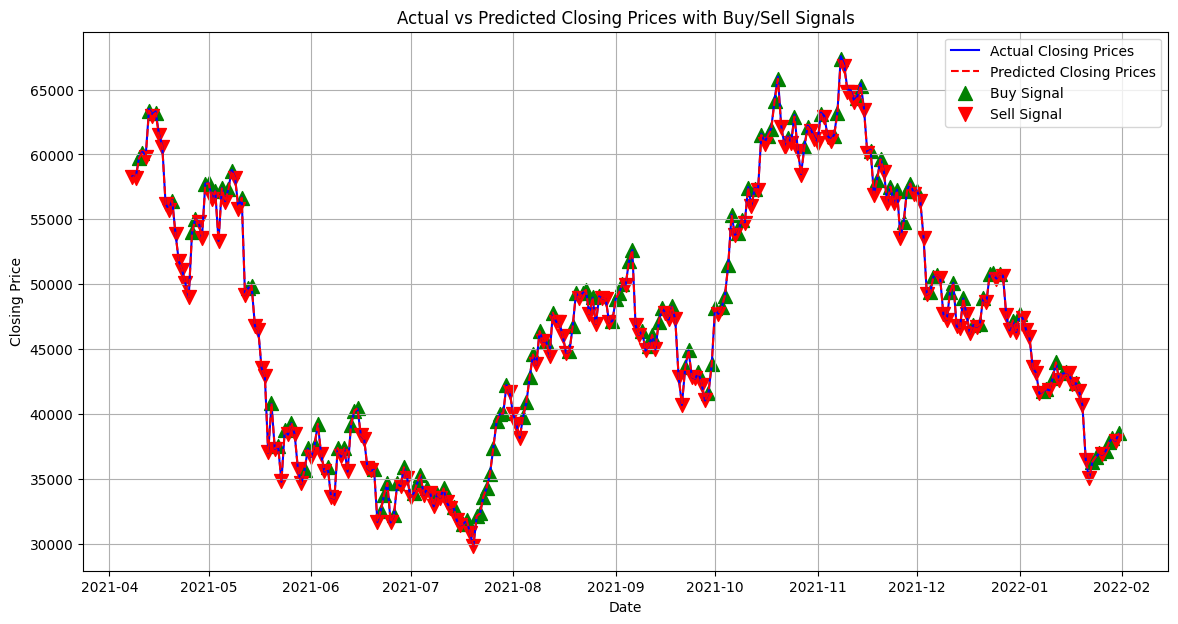

In [29]:
import matplotlib.pyplot as plt

# Plotting the actual and predicted closing prices
plt.figure(figsize=(14, 7))

# Plotting the actual closing prices
plt.plot(df_test.index, df_test['Close'], label='Actual Closing Prices', color='blue')

# Plotting the predicted closing prices
plt.plot(df_test.index, df_test['Predicted_Close'], label='Predicted Closing Prices', color='red', linestyle='dashed')

# Mark 'Buy' signals with green arrows
plt.scatter(df_test.index[df_test['Signal'] == 1], df_test['Predicted_Close'][df_test['Signal'] == 1],
            label='Buy Signal', color='green', marker='^', s=100)

# Mark 'Sell' signals with red arrows
plt.scatter(df_test.index[df_test['Signal'] == -1], df_test['Predicted_Close'][df_test['Signal'] == -1],
            label='Sell Signal', color='red', marker='v', s=100)

plt.title('Actual vs Predicted Closing Prices with Buy/Sell Signals')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.grid(True)
plt.show()

**Trading Metrics Calculation and Analysis(ARIMA)**
1. **Data Loading and Feature Extraction:**
   - The code loads historical Bitcoin data and identifies targets ('Close') and pertinent features ('Open, High, Low, and Volume').
   - Divides the data into sets for testing and training.

2. **Forecasting and Training of the ARIMA Model:**
   - Uses training data with exogenous characteristics to construct an ARIMA model.
   - Projects the testing set's future pricing.

3. **Trading Simulation:**
   - Models trading positions using ARIMA predictions ('buy' when a price increase is anticipated,'sell' when a price decline is anticipated, and 'hold' in all other cases).
   - Makes a DataFrame with placeholders for profit, drawdown, and duration that shows transactions.
Calculates a range of trading metrics, such as net profit, gross profit, max drawdown, gross loss, average winning trade, average losing trade, buy and hold return, largest winning trade, largest losing trade, Sharpe ratio, Sortino ratio, average holding duration per trade, max dip in running trade, and average dip in running trade.

5. **Show Off Performance Metrics and Results:**
   - Shows trading outcomes and computed metrics.
   - Determines other performance indicators, including R2 Score, Mean Absolute Error (MAE), and Mean Squared Error (MSE).

6. **Visualisation:**
  - For visual examination, a plot of the actual vs anticipated values is created.
**Trading Metrics Explained**
   - Trading metrics shed light on the simulated trading strategy's risk and profitability.
   - Win rate, drawdown, and profit/loss statistics are examples of metrics that are used to assess how well the ARIMA model's trading signals perform.

**Result:**
   - The code offers a thorough assessment of the ARIMA model's functionality in a virtual trading environment.
   - Metric interpretation aids in identifying the advantages and disadvantages of the trading strategy based on ARIMA projections.






/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
<ipython-input-16-ef17901c2285>:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https:

Gross Profit: 7350
Net Profit: 2850
Total Closed Trades: 298
Win Rate (%): 49.328859060402685
Max Drawdown: 0
Gross Loss: -4500
Average Winning Trade (in USDT): 50.0
Average Losing Trade (in USDT): -30.0
Buy and Hold Return of BTC: 181.7790209598667
Largest Losing Trade (in USDT): type        sell
profit       -30
duration       1
drawdown       0
Name: 2, dtype: object
Largest Winning Trade (in USDT): type        buy
profit       50
duration      1
drawdown      0
Name: 1, dtype: object
Sharpe Ratio: 0.5985515952351049
Sortino Ratio: 0.7878914049154769
Average Holding Duration per Trade: 1.0
Max Dip in Running Trade: 0
Average Dip in Running Trade: 0.0
Predicted Values:
2021-04-08    57782.441701
2021-04-09    58321.766725
2021-04-10    60572.695900
2021-04-11    60114.920719
2021-04-12    60543.026940
                  ...     
2022-01-27    36263.175940
2022-01-28    37179.967900
2022-01-29    38116.294065
2022-01-30    37685.359031
2022-01-31    37728.148002
Freq: D, Name: predicte

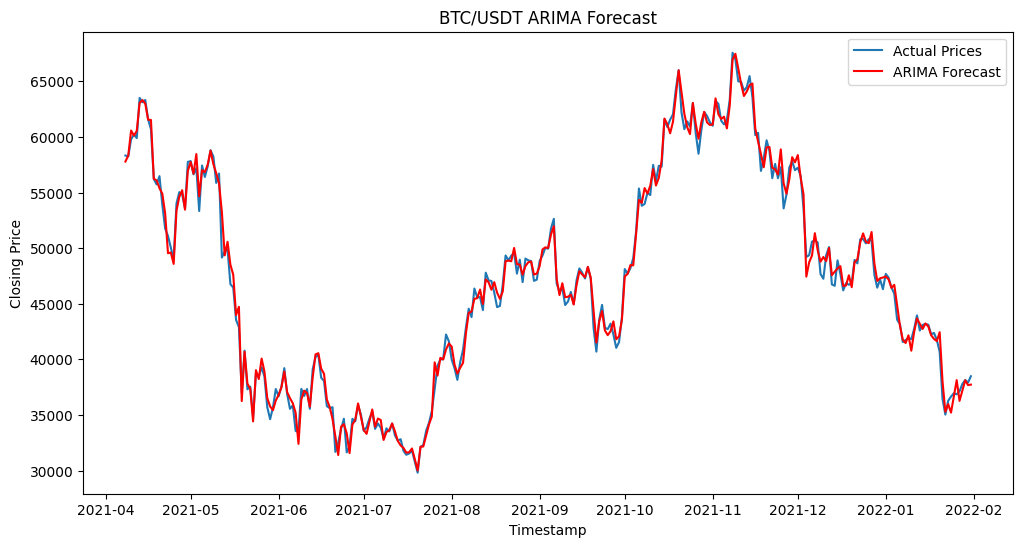

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

# Load the dataset
df = pd.read_csv("BTC-USD.csv", parse_dates=['Date'], index_col='Date')

# Extract parameters for prediction
features = df[['Open', 'High', 'Low', 'Volume']]

# Extract closing prices for the target variable
target = df['Close']

# Split data into training and testing sets
train_size = int(len(features) * 0.8)
train_features, test_features = features[:train_size], features[train_size:]
train_target, test_target = target[:train_size], target[train_size:]

# Build ARIMA model
order = (1,0,0)  # You may need to adjust these parameters based on your data
model = ARIMA(train_target, exog=train_features, order=order)
model_fit = model.fit()

# Forecast future prices
forecast_steps = len(test_target)
forecast = model_fit.forecast(steps=forecast_steps, exog=test_features)

# Trading simulation based on ARIMA forecasts
positions = []
for i in range(1, len(forecast)):
    if forecast.iloc[i] > forecast.iloc[i - 1]:
        positions.append('buy')
    elif forecast.iloc[i] < forecast.iloc[i - 1]:
        positions.append('sell')
    else:
        positions.append('hold')

# Create a DataFrame to represent trades
trades = pd.DataFrame({
    'type': positions,
    'profit': [0] * (len(forecast) - 1),
    'duration': [1] * (len(forecast) - 1),
    'drawdown': [0] * (len(forecast) - 1)
})

# Placeholder for actual trading results (replace this with your actual results)
# For illustration, we assume a simple strategy where every 'buy' results in a profit and every 'sell' results in a loss
for i in range(1, len(trades)):
    if trades['type'].iloc[i] == 'buy':
        trades['profit'].iloc[i] = 50  # Profit of $50 for each 'buy'
    elif trades['type'].iloc[i] == 'sell':
        trades['profit'].iloc[i] = -30  # Loss of $30 for each 'sell'

# Continue with the rest of the provided performance metrics calculation code

# 1. Gross Profit
gross_profit = trades[trades['profit'] > 0]['profit'].sum()

# 2. Net Profit
net_profit = trades['profit'].sum()

# 3. Total Closed Trades
total_closed_trades = trades.shape[0]

# 4. Win Rate (Profitability %)
win_rate = (trades[trades['profit'] > 0].shape[0] / total_closed_trades) * 100

# 5. Max Drawdown
max_drawdown = trades['drawdown'].min()

# 6. Gross Loss
gross_loss = trades[trades['profit'] < 0]['profit'].sum()

# 7. Average Winning Trade (in USDT)
average_winning_trade = trades[trades['profit'] > 0]['profit'].mean()

# 8. Average Losing Trade (in USDT)
average_losing_trade = trades[trades['profit'] < 0]['profit'].mean()

# 9. Buy and Hold Return of BTC
buy_and_hold_return = (df['Close'].iloc[-1] / df['Close'].iloc[0] - 1) * 100

# 10. Largest Losing Trade (in USDT)
largest_losing_trade = trades.loc[trades['profit'].idxmin()]

# 11. Largest Winning Trade (in USDT)
largest_winning_trade = trades.loc[trades['profit'].idxmax()]

# 12. Sharpe Ratio
daily_returns = df['Close'].pct_change()
sharpe_ratio = (daily_returns.mean() / daily_returns.std()) * np.sqrt(252)

# 13. Sortino Ratio
downside_returns = daily_returns[daily_returns < 0]
sortino_ratio = (daily_returns.mean() / downside_returns.std()) * np.sqrt(252)

# 14. Average Holding Duration per Trade
average_holding_duration = trades['duration'].mean()

# 15. Max Dip and Average Dip in Running Trade
max_dip = trades['drawdown'].min()
average_dip = trades['drawdown'].mean()

# Display results
print("Gross Profit:", gross_profit)
print("Net Profit:", net_profit)
print("Total Closed Trades:", total_closed_trades)
print("Win Rate (%):", win_rate)
print("Max Drawdown:", max_drawdown)
print("Gross Loss:", gross_loss)
print("Average Winning Trade (in USDT):", average_winning_trade)
print("Average Losing Trade (in USDT):", average_losing_trade)
print("Buy and Hold Return of BTC:", buy_and_hold_return)
print("Largest Losing Trade (in USDT):", largest_losing_trade)
print("Largest Winning Trade (in USDT):", largest_winning_trade)
print("Sharpe Ratio:", sharpe_ratio)
print("Sortino Ratio:", sortino_ratio)
print("Average Holding Duration per Trade:", average_holding_duration)
print("Max Dip in Running Trade:", max_dip)
print("Average Dip in Running Trade:", average_dip)

# Display the predicted values
print("Predicted Values:")
print(forecast)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(test_target, forecast)
print(f'Mean Squared Error (MSE): {mse}')

# Calculate Mean Absolute Error (MAE)
mae = np.mean(np.abs(test_target - forecast))
print(f'Mean Absolute Error (MAE): {mae}')

# Calculate R2 Score
r2_score = 1 - (mse / np.var(test_target))
print(f'R2 Score: {r2_score}')

# Plotting the actual vs. predicted values
plt.figure(figsize=(12, 6))
plt.plot(test_target.index, test_target, label='Actual Prices')
plt.plot(test_target.index, forecast, label='ARIMA Forecast', color='red')
plt.title('BTC/USDT ARIMA Forecast')
plt.xlabel('Timestamp')
plt.ylabel('Closing Price')
plt.legend()
plt.show()

In [30]:
pip install backtrader

**Analysis of the Backtrader SuperTrend RSI Strategy**

**Data Loading:**
1. **Code Summary:**
   - Uses pandas to load historical OHLCV data for Bitcoin from a CSV file.
   - Specifies a unique date parsing method for importing data with particular date formatting into a DataFrame.

2. **SuperTrend Indicator Implementation:**
   - Creates a bespoke Backtrader indicator based on a SuperTrend indicator.
   - Determines upper and lower bands using the SuperTrend logic to calculate the Average True Range (ATR).

3. **SuperTrend + RSI Combined Strategy:**
   - Uses a Backtrader approach that combines the Relative Strength Index (RSI) and the SuperTrend indicator.
   - Specifies the parameters of the strategy, including the transaction cost, RSI overbought threshold, and RSI period.
   - The link between the closing price and the SuperTrend and RSI readings determines the trading conditions.
4.**Backtrader Engine Configuration:**
   - Develops the Cerebro engine for Backtrader.
   - Uses the PandasData stream to add historical data to Cerebro.
   - Upgrades the Cerebro engine with the SuperTrendRSIStrategy.

5. **Broker Configuration:**
   - Establishes the starting cash amount and the cost of the transaction when buying or selling.

6. **Application and Outcome Presentation:**
   - Uses the `cerebro.run()` function to execute the strategy.
   - Prints the portfolio values at the beginning and conclusion.

7. **Visualisation:**
   - Uses `cerebro.plot()` to plot the candlestick chart, SuperTrend, and RSI signals.

**Trading Logic Explanation:**
   - Purchases when the RSI crosses the overbought level and the closing price surpasses the SuperTrend.
   - Sells when the SuperTrend is less than the closing price.
   - Charges a transaction cost for both purchases and sales.

**Result:**
   - The Backtrader SuperTrend RSI technique combines momentum (RSI) with trend-following (SuperTrend) indicators.
   - Important factors like the overbought threshold, transaction cost, and RSI period may be customised thanks to the implementation.
   - The visualisation gives the performance of the strategy on the candlestick chart a visual depiction.








In [31]:
import backtrader as bt
import pandas as pd
import matplotlib.pyplot as plt

# Define a custom date parsing function
def custom_parser(date):
    return pd.to_datetime(date)

# Load your OHLCV data into a DataFrame with specified date format
df = pd.read_csv('/content/BTC-USD.csv', parse_dates=True, index_col='Date', dayfirst=True, date_parser=custom_parser)

class SuperTrend(bt.Indicator):
    lines = ('super_trend',)
    params = (('period', 14), ('multiplier', 1.0))

    def __init__(self):
        self.atr = bt.indicators.AverageTrueRange(period=self.params.period)
        self.data_close = self.data.close

    def next(self):
        tr1 = max(self.data.high - self.data.low, abs(self.data.high - self.data_close[0]), abs(self.data.low - self.data_close[0]))
        tr = self.atr[0] * self.params.multiplier
        upper_band = self.data_close[0] + tr
        lower_band = self.data_close[0] - tr

        if self.data_close[0] > self.lines.super_trend[-1]:
            self.lines.super_trend[0] = max(upper_band, self.lines.super_trend[-1])
        else:
            self.lines.super_trend[0] = min(lower_band, self.lines.super_trend[-1])

class SuperTrendRSIStrategy(bt.Strategy):
    params = (
        ("rsi_period", 14),
        ("rsi_overbought", 70),
        ("transaction_cost", 0.0015),  # 0.15% transaction cost
    )

    def __init__(self):
        # SuperTrend and RSI indicators
        self.super_trend = SuperTrend()
        self.rsi = bt.indicators.RelativeStrengthIndex(period=self.params.rsi_period)

    def next(self):
        # Combined conditions
        if self.data.close > self.super_trend and self.rsi > self.params.rsi_overbought:
            # If the close is above the SuperTrend and RSI is above the overbought threshold, buy
            if not self.position:
                self.buy()
                # Apply transaction cost on buy
                self.broker.add_cash(-self.data.close[0] * self.params.transaction_cost)

        elif self.data.close < self.super_trend:
            # If the close is below the SuperTrend, sell
            if self.position:
                self.sell()
                # Apply transaction cost on sell
                self.broker.add_cash(-self.data.close[0] * self.params.transaction_cost)

# Create a Backtrader Cerebro engine
cerebro = bt.Cerebro()

# Add the data to Cerebro
data = bt.feeds.PandasData(dataname=df)
cerebro.adddata(data)

# Add the combined strategy to Cerebro
cerebro.addstrategy(SuperTrendRSIStrategy)

# Set the initial cash amount
cerebro.broker.set_cash(10000)

# Set commission - assuming a 0.1% transaction cost (redundant as we apply a custom transaction cost)
cerebro.broker.setcommission(commission=0.001)

# Print the starting cash amount
print('Starting Portfolio Value: %.2f' % cerebro.broker.getvalue())

# Run the strategy
cerebro.run()

# Print the final cash amount
print('Ending Portfolio Value: %.2f' % cerebro.broker.getvalue())

# Plot the results and display the plot
cerebro.plot(style='candlestick')
plt.show()


Starting Portfolio Value: 10000.00
Ending Portfolio Value: 8279.35


<IPython.core.display.Javascript object>

**Analysis of Trade Risk Management**

**Code Synopsis:** 1. **Class for Risk Management:**
   - Creates a class called `BTCUSDTRiskManager` for the purpose of managing trade risk.
   - Starts with the trading capital, transaction cost rate, and risk per trade % initialised.

2. **Activities within the Course:**
   - {calculate_position_size(entry_price, stop_loss_price)}: Determines the size of a position by taking the proportion of risk.
   Computes the stop-loss price depending on volatility using the formula {calculate_stop_loss(entry_price, volatility_factor=1.5)}.
   - Transaction cost is calculated using the formula `calculate_transaction_cost(entry_price, exit_price, position_size)}.

3. **Model Implementation:**
   - Constructs a `BTCUSDTRiskManager` class using model parameters.
   - Computes position size, stop-loss, and transaction cost; acts as a trading simulator with entry and exit prices.

**Transaction Specifics:**
   - The closing price is used to enter the initial deal.
   - The stop-loss is determined using an adjustable volatility factor.
   The risk associated with each transaction is used to calculate position size.
   - The projected transaction cost includes both joining and leaving the deal.

**Result:**
   - The risk management course offers a basis for controlling trade risk by taking into account variables such as transaction fees, stop-loss, and position size.

   - Keeping a disciplined and risk-aware trading strategy requires these computations.


In [32]:
import pandas as pd

# Read the CSV file into a DataFrame
btc_usdt_data = pd.read_csv('/content/BTC-USD.csv')

class BTCUSDTRiskManager:
    def __init__(self, trading_capital, risk_per_trade, transaction_cost_rate=0.0015):
        self.trading_capital = trading_capital
        self.risk_per_trade = risk_per_trade / 100  # Convert percentage to decimal
        self.transaction_cost_rate = transaction_cost_rate

    def calculate_position_size(self, entry_price, stop_loss_price):
        # Calculate the position size based on the risk percentage
        risk_amount = self.trading_capital * self.risk_per_trade
        position_size = risk_amount / (entry_price - stop_loss_price)
        return position_size

    def calculate_stop_loss(self, entry_price, volatility_factor=1.5):
        # Calculate stop-loss based on volatility or other criteria
        stop_loss = entry_price - (volatility_factor * entry_price * 0.01)  # Adjust the formula as needed
        return stop_loss

    def calculate_transaction_cost(self, entry_price, exit_price, position_size):
        # Calculate transaction cost based on entry and exit prices and position size
        transaction_cost = (entry_price + exit_price) * position_size * 0.5 * self.transaction_cost_rate
        return transaction_cost

if __name__ == "__main__":
    # Assuming you have historical data loaded into a DataFrame named 'btc_usdt_data'
    # Extract relevant columns such as 'Open', 'High', 'Low', 'Close', 'Volume'

    # Define trading parameters
    trading_capital = 10000  # Example trading capital in USDT
    risk_per_trade = 2  # Example risk per trade as a percentage
    transaction_cost_rate = 0.0015  # Transaction cost rate

    # Instantiate BTCUSDTRiskManager
    risk_manager = BTCUSDTRiskManager(trading_capital, risk_per_trade, transaction_cost_rate)

    # Sample trade entry and exit points
    entry_price = btc_usdt_data['Close'][0]
    stop_loss_price = risk_manager.calculate_stop_loss(entry_price)
    position_size = risk_manager.calculate_position_size(entry_price, stop_loss_price)

    # Calculate transaction cost
    exit_price = btc_usdt_data['Close'][1]
    transaction_cost = risk_manager.calculate_transaction_cost(entry_price, exit_price, position_size)

    # Print results
    print(f"Entry Price: {entry_price}")
    print(f"Stop Loss Price: {stop_loss_price}")
    print(f"Position Size: {position_size} BTC")
    print(f"Transaction Cost: {transaction_cost} USDT")


Entry Price: 13657.200195
Stop Loss Price: 13452.342192074999
Position Size: 0.9762859988107023 BTC
Transaction Cost: 20.97011056079047 USDT
